#  PYTHON

In [ ]:
Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.


In [11]:

def find_highest_frequency_word_length(string):
    # Split the string into words
    words = string.split()

    # Count the frequency of each word
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

    # Find the maximum frequency
    max_frequency = max(word_frequency.values())

    # Find the length of the word with the maximum frequency
    max_frequency_word_length = max(len(word) for word, frequency in word_frequency.items() if frequency == max_frequency)

    return max_frequency_word_length


# Test the program
string = "write write write all the number from from from 1 to 100"
result = find_highest_frequency_word_length(string)
print(result)  # Output: 5

5


In [ ]:
Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .


In [54]:

def check_valid_string(s):
    # Count the frequency of each character
    char_frequency = {}
    for char in s:
        if char in char_frequency:
            char_frequency[char] += 1
        else:
            char_frequency[char] = 1

    # Check if all frequencies are the same
    frequencies = list(char_frequency.values())
    #print(frequencies)
    #if len(set(frequencies)) == 1:
    #    return "YES"
    
    
    for i in range(0,len(frequencies)-1):
            if frequencies[i]==frequencies[i+1]:
                print("yes")
    else:
            print("no")

    # Check if removing one character can make all frequencies the same
    ''' for char in char_frequency:
        char_frequency[char] -= 1
        updated_frequencies = list(char_frequency.values())
        if len(set(updated_frequencies)) == 1:
            return "YES"
        char_frequency[char] += 1

    return "NO" '''


# Test the program
s1 = "abc"
s2 = "abcc"
print(check_valid_string(s1))  # Output: YES
print(check_valid_string(s2))  # Output: NO


yes
yes
no
None
yes
no
None


In [ ]:
Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

In [85]:

import requests
import pandas as pd

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data")

def convert_to_dataframe(data):
    pokemon_list = []
    for pokemon in data['pokemon']:
        pokemon_info = {
            'id': pokemon.get('id', ''),
            'num': pokemon.get('num', ''),
            'name': pokemon.get('name', ''),
            'img': pokemon.get('img', ''),
            'type': ', '.join(pokemon.get('type', [])),
            'height': pokemon.get('height', ''),
            'weight': pokemon.get('weight', ''),
            'candy': pokemon.get('candy', ''),
            'candy_count': pokemon.get('candy_count', 0),
            'egg': pokemon.get('egg', ''),
            'spawn_chance': pokemon.get('spawn_chance', 0),
            'avg_spawns': pokemon.get('avg_spawns', 0),
            'spawn_time': pokemon.get('spawn_time', ''),
            'multipliers': ', '.join(map(str, pokemon.get('multipliers', []))) if pokemon.get('multipliers') else '',
            'weaknesses': ', '.join(pokemon.get('weaknesses', [])),
            'next_evolution': ', '.join([evo.get('name', '') for evo in pokemon.get('next_evolution', [])]),
            'prev_evolution': ', '.join([evo.get('name', '') for evo in pokemon.get('prev_evolution', [])])
        }
        pokemon_list.append(pokemon_info)

    df = pd.DataFrame(pokemon_list)
    return df

def save_to_excel(df, filename):
    df.to_excel(filename, index=False)

# URL of the data source
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Download the data
pokemon_data = download_data(url)

#print(pokemon_data)
# Convert the data to a DataFrame
pokemon_df = convert_to_dataframe(pokemon_data)

# Save the DataFrame to Excel
excel_filename = "pokemon_data.xlsx"
save_to_excel(pokemon_df, excel_filename)


In [ ]:
Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.


In [108]:

import requests
import pandas as pd

# URL of the data source
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to download the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()
    
    # Create a DataFrame from the JSON data
    df = pd.DataFrame(data)
    
    # Select the desired columns
    df = df[["name", "id", "nametype", "recclass", "mass", "year", "reclat", "reclong", "geolocation"]]
    
    # Extract the geolocation coordinates, handling missing values
    df["coordinates"] = df["geolocation"].apply(lambda x: x["coordinates"] if isinstance(x, dict) and "coordinates" in x else None)
    
    # Rename columns
    df = df.rename(columns={"name": "Name of Earth Meteorite", "id": "ID of Earth Meteorite",
                            "nametype": "Meteorite Type", "recclass": "Recclass",
                            "mass": "Mass of Earth Meteorite", "year": "Year",
                            "reclat": "Latitude", "reclong": "Longitude",
                            "coordinates": "Point Coordinates"})
    
    # Save the DataFrame as a CSV file
    df.to_csv("earth_meteorites.csv", index=False)
    print("CSV file saved successfully.")
else:
    print("Failed to download the data.")
df.head() 


CSV file saved successfully.


,Name of Earth Meteorite,ID of Earth Meteorite,Meteorite Type,Recclass,Mass of Earth Meteorite,Year,Latitude,Longitude,geolocation,Point Coordinates
0,Aachen,1,Valid,L5,21,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....","[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...","[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...","[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...","[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....","[-64.95, -33.16667]"


In [ ]:
Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting


In [121]:

import requests
import json
import pandas as pd
from bs4 import BeautifulSoup

# API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response as JSON
    data = json.loads(response.text)

    # Extract the episodes data
    episodes = data["_embedded"]["episodes"]

    # List to store the extracted episode information
    extracted_data = []

    # Iterate over each episode
    for episode in episodes:
        # Extract the required attributes
        episode_data = {
            "id": episode["id"],
            "url": episode["url"],
            "name": episode["name"],
            "season": episode["season"],
            "number": episode["number"],
            "type": episode["type"],
            "airdate": episode["airdate"],
            "airtime": episode["airtime"],
            "runtime": episode["runtime"],
            "rating": episode["rating"]["average"],
            "summary": BeautifulSoup(episode["summary"], "html.parser").get_text(),
            "medium_image_link": episode["image"]["medium"],
            "original_image_link": episode["image"]["original"]
        }

        # Append the extracted data to the list
        extracted_data.append(episode_data)

    # Create a DataFrame from the extracted data
    df = pd.DataFrame(extracted_data)

    # Save the DataFrame to a CSV file
    df.to_csv("westworld_episodes.csv", index=False)

    print("Data downloaded and saved successfully.")
else:
    print("Failed to retrieve data from the API.")



Data downloaded and saved successfully.


In [ ]:
Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.


Pokemons with spawn rate less than 5%:
           name  spawn_chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]

Pokemons with less than 4 weaknesses:
Empty DataFrame
Columns: [name, weaknesses]
Index: []

Pokemons with no multipliers:
           name multipliers
2      Venusaur         NaN
5     Charizard         NaN
8     Blastoise         NaN
11   Butterfree         NaN
14     Beedrill         NaN
..          ...         ...
144      Zapdos         NaN
145     Moltres         NaN
148   Dragonite         NaN
149      Mewtwo         NaN
150         Mew         NaN

[81 rows x 2 columns]

Pokemons with less than 2 evolutions:
           name         next_evolution
0     Bulbasaur 

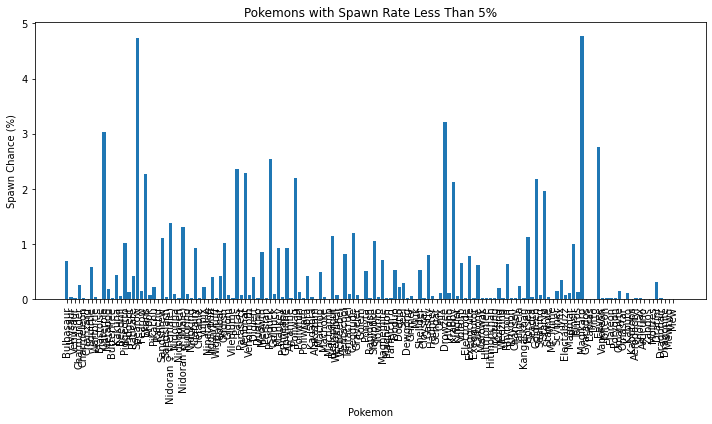

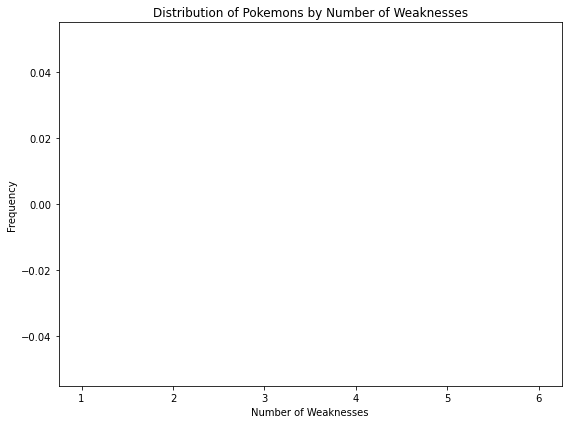

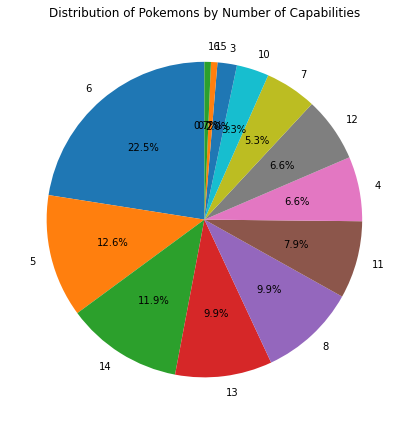

In [120]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a pandas DataFrame
pokemon_df = pd.read_excel("pokemon_data.xlsx")

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = pokemon_df[pokemon_df['spawn_chance'] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5[['name', 'spawn_chance']])

# Get all Pokemons that have less than 4 weaknesses
weakness_less_than_4 = pokemon_df[pokemon_df['weaknesses'].apply(lambda x: len(x) < 4)]
print("\nPokemons with less than 4 weaknesses:")
print(weakness_less_than_4[['name', 'weaknesses']])

# Get all Pokemons that have no multipliers at all
no_multipliers = pokemon_df[pokemon_df['multipliers'].apply(lambda x: isinstance(x, float))]
print("\nPokemons with no multipliers:")
print(no_multipliers[['name', 'multipliers']])


# Get all Pokemons that do not have more than 2 evolutions
evolution_less_than_2 = pokemon_df[pd.isna(pokemon_df['next_evolution']) | pokemon_df['next_evolution'].apply(lambda x: len(x) if not pd.isna(x) else 0) < 3]
print("\nPokemons with less than 2 evolutions:")
print(evolution_less_than_2[['name', 'next_evolution']])

# Convert spawn time from "minute:second" format to seconds
pokemon_df['spawn_time_seconds'] = pokemon_df['spawn_time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if not pd.isna(x) else 0)

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = pokemon_df[pokemon_df['spawn_time_seconds'] < 300]
print("\nPokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300[['name', 'spawn_time_seconds']])

# Get all Pokemon who have more than two types of capabilities
pokemon_df['num_capabilities'] = pokemon_df['type'].apply(lambda x: len(x))
more_than_two_capabilities = pokemon_df[pokemon_df['num_capabilities'] > 2]
print("\nPokemons with more than two types of capabilities:")
print(more_than_two_capabilities[['name', 'type']])

# Generate plots

# Bar plot for spawn rate less than 5%
plt.figure(figsize=(10, 6))
plt.bar(spawn_rate_less_than_5['name'], spawn_rate_less_than_5['spawn_chance'])
plt.xlabel('Pokemon')
plt.ylabel('Spawn Chance (%)')
plt.title('Pokemons with Spawn Rate Less Than 5%')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histogram for number of weaknesses
plt.figure(figsize=(8, 6))
plt.hist(weakness_less_than_4['weaknesses'].apply(len), bins=range(1, 7))
plt.xlabel('Number of Weaknesses')
plt.ylabel('Frequency')
plt.title('Distribution of Pokemons by Number of Weaknesses')
plt.xticks(range(1, 7))
plt.tight_layout()
plt.show()

# Pie chart for Pokemon capabilities
capabilities_count = pokemon_df['num_capabilities'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(capabilities_count, labels=capabilities_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Pokemons by Number of Capabilities')
plt.tight_layout()
plt.show()


In [ ]:
Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding


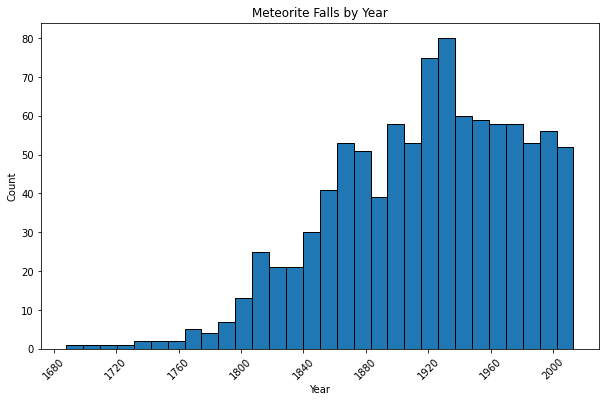

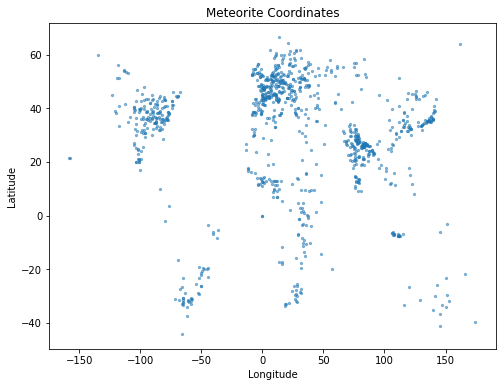

<Figure size 576x432 with 0 Axes>

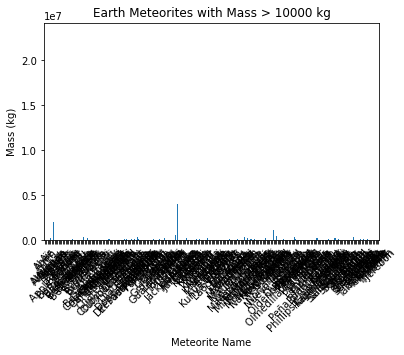

Insights:
1. Total Earth meteorites that fell before the year 2000: 912
2. Total Earth meteorites' coordinates that fell before the year 1970: 763
3. Total Earth meteorites with mass > 10000 kg: 243


In [116]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("earth_meteorites.csv")
# Convert the "year" column to datetime format
df["Year"] = pd.to_datetime(df["Year"], errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df["Year"].dt.year < 2000]

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[df["Year"].dt.year < 1970][["Latitude", "Longitude"]]

# Assuming the mass of Earth meteorites is in kg, get all those with a mass greater than 10000 kg
earth_meteorites_mass_gt_10000kg = df[df["Mass of Earth Meteorite"] > 10000]

# Plotting

# Histogram of meteorite falls by year
plt.figure(figsize=(10, 6))
plt.hist(df["Year"], bins=30, edgecolor="black")
plt.title("Meteorite Falls by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Scatter plot of meteorite coordinates
plt.figure(figsize=(8, 6))
plt.scatter(df["Longitude"], df["Latitude"], s=5, alpha=0.5)
plt.title("Meteorite Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Bar chart of meteorites mass greater than 10000 kg
plt.figure(figsize=(8, 6))
earth_meteorites_mass_gt_10000kg.plot(kind="bar", x="Name of Earth Meteorite", y="Mass of Earth Meteorite", legend=False)
plt.title("Earth Meteorites with Mass > 10000 kg")
plt.xlabel("Meteorite Name")
plt.ylabel("Mass (kg)")
plt.xticks(rotation=45)
plt.show()

# Summary of insights
print("Insights:")
print("1. Total Earth meteorites that fell before the year 2000:", len(earth_meteorites_before_2000))
print("2. Total Earth meteorites' coordinates that fell before the year 1970:", len(earth_meteorites_coordinates_before_1970))
print("3. Total Earth meteorites with mass > 10000 kg:", len(earth_meteorites_mass_gt_10000kg))


In [ ]:
Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding


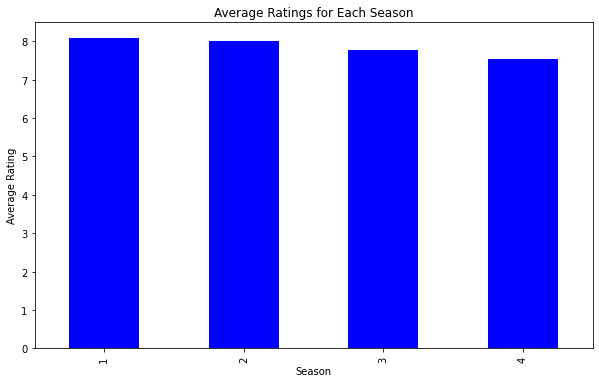

Average Ratings for Each Season:
season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating, dtype: float64

Episode Names with Average Rating > 8 for Each Season:
6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

Episode Names Aired Before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kik

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON data into a DataFrame
df = pd.read_csv("westworld_episodes.csv")

# Get all the overall ratings for each season
season_ratings = df.groupby("season")["rating"].mean()

# Plotting the ratings for each season
plt.figure(figsize=(10, 6))
season_ratings.plot(kind="bar", color="blue")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.show()

# Get all the episode names with an average rating greater than 8 for every season
high_rated_episodes = df.groupby(["season", "name"]).filter(lambda x: x["rating"].mean() > 8)["name"]

# Get all the episode names that aired before May 2019
df["airdate"] = pd.to_datetime(df["airdate"])
episodes_before_2019 = df[df["airdate"] < pd.to_datetime("2019-05-01")]["name"]

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby("season")["rating"].idxmax().apply(lambda x: df.loc[x]["name"])
lowest_rated_episodes = df.groupby("season")["rating"].idxmin().apply(lambda x: df.loc[x]["name"])

# Get the summary for the most popular (highest ratings) episode in every season
most_popular_summary = df.groupby("season").apply(lambda x: x[x["rating"] == x["rating"].max()]["summary"].iloc[0])

# Print the results
print("Average Ratings for Each Season:")
print(season_ratings)
print("\nEpisode Names with Average Rating > 8 for Each Season:")
print(high_rated_episodes)
print("\nEpisode Names Aired Before May 2019:")
print(episodes_before_2019)
print("\nEpisode with the Highest Rating in Each Season:")
print(highest_rated_episodes)
print("\nEpisode with the Lowest Rating in Each Season:")
print(lowest_rated_episodes)
print("\nSummary for the Most Popular Episode in Each Season:")
print(most_popular_summary)

In [ ]:
Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions


Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars with model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []

Cars with an electric range of more than 100 and made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      98382.0 

<Figure size 720x432 with 0 Axes>

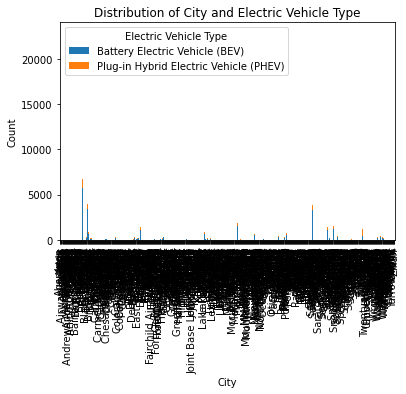

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "No"][["Make", "Model"]]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars)
print()

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df[(df["Make"] == "TESLA") & (df["City"] == "BOTHELL")][["Model Year", "Model"]]
print("TESLA cars with model year and model type made in Bothell City:")
print(tesla_cars_bothell)
print()

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_range_100_plus = df[(df["Electric Range"] > 100) & (df["Model Year"] > 2015)]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_cars_range_100_plus)
print()

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10, 6))
df.groupby(["City", "Electric Vehicle Type"]).size().unstack().plot(kind="bar", stacked=True)
plt.title("Distribution of City and Electric Vehicle Type")
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="Electric Vehicle Type")
plt.show()


In [ ]:
Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.


In [132]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Tag the words with their corresponding part-of-speech
    tagged_words = pos_tag(words)
    
    # Initialize counters
    noun_count = 0
    pronoun_count = 0
    verb_count = 0
    adjective_count = 0
    
    # Iterate over the tagged words and count the respective part-of-speech
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            noun_count += 1
        elif tag.startswith('PR'):  # Pronoun
            pronoun_count += 1
        elif tag.startswith('VB'):  # Verb
            verb_count += 1
        elif tag.startswith('JJ'):  # Adjective
            adjective_count += 1
    
    # Create a dictionary with the counts
    pos_counts = {
        "nouns": noun_count,
        "pronouns": pronoun_count,
        "verbs": verb_count,
        "adjectives": adjective_count
    }
    
    return pos_counts

# Test the function
text = "I like to eat apples and oranges. They are delicious."
counts = count_pos_tags(text)
print(counts)


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\shrik/nltk_data'
    - 'c:\\users\\shrik\\appdata\\local\\programs\\python\\python39\\nltk_data'
    - 'c:\\users\\shrik\\appdata\\local\\programs\\python\\python39\\share\\nltk_data'
    - 'c:\\users\\shrik\\appdata\\local\\programs\\python\\python39\\lib\\nltk_data'
    - 'C:\\Users\\shrik\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
